In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import os
import sys

# Add path to import EquiBoots
script_path = os.path.abspath("../py_scripts")
print("Appending path:", script_path)
sys.path.append(script_path)

from EquiBoots import EquiBoots

Appending path: /home/lshpaner/Documents/GitHub_Repositories/equi_boots/py_scripts


In [5]:
def eq_plot_roc_auc(
    data: dict,
    save_path: str = None,
    filename: str = "roc_auc_by_group",
    title: str = "ROC Curve by Group",
    figsize: tuple = (8, 6),
    dpi: int = 300,
    tick_fontsize: int = 10,
    decimal_places: int = 2,
):
    """
    Plot ROC AUC curves for each group in a fairness category from a dictionary.
    """

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    for group, values in sorted(data.items()):
        y_true = values["y_true"]
        y_prob = values["y_prob"]

        if len(set(y_true)) < 2:
            continue

        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)

        total = len(y_true)
        positives = np.sum(y_true)
        negatives = total - positives

        label = (
            f"AUC for {group} = {roc_auc:.{decimal_places}f}, "
            f"Count: {total:,}, Pos: {positives:,}, Neg: {negatives:,}"
        )
        ax.plot(fpr, tpr, label=label)

    ax.plot([0, 1], [0, 1], "k--", lw=1)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(title)
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.25),
        fontsize=tick_fontsize,
        ncol=1,
    )
    ax.grid(True)
    plt.tight_layout()

    if save_path:
        os.makedirs(save_path, exist_ok=True)
        fig.savefig(os.path.join(save_path, f"{filename}.png"), bbox_inches="tight")
        plt.close(fig)

    return fig

Groups created


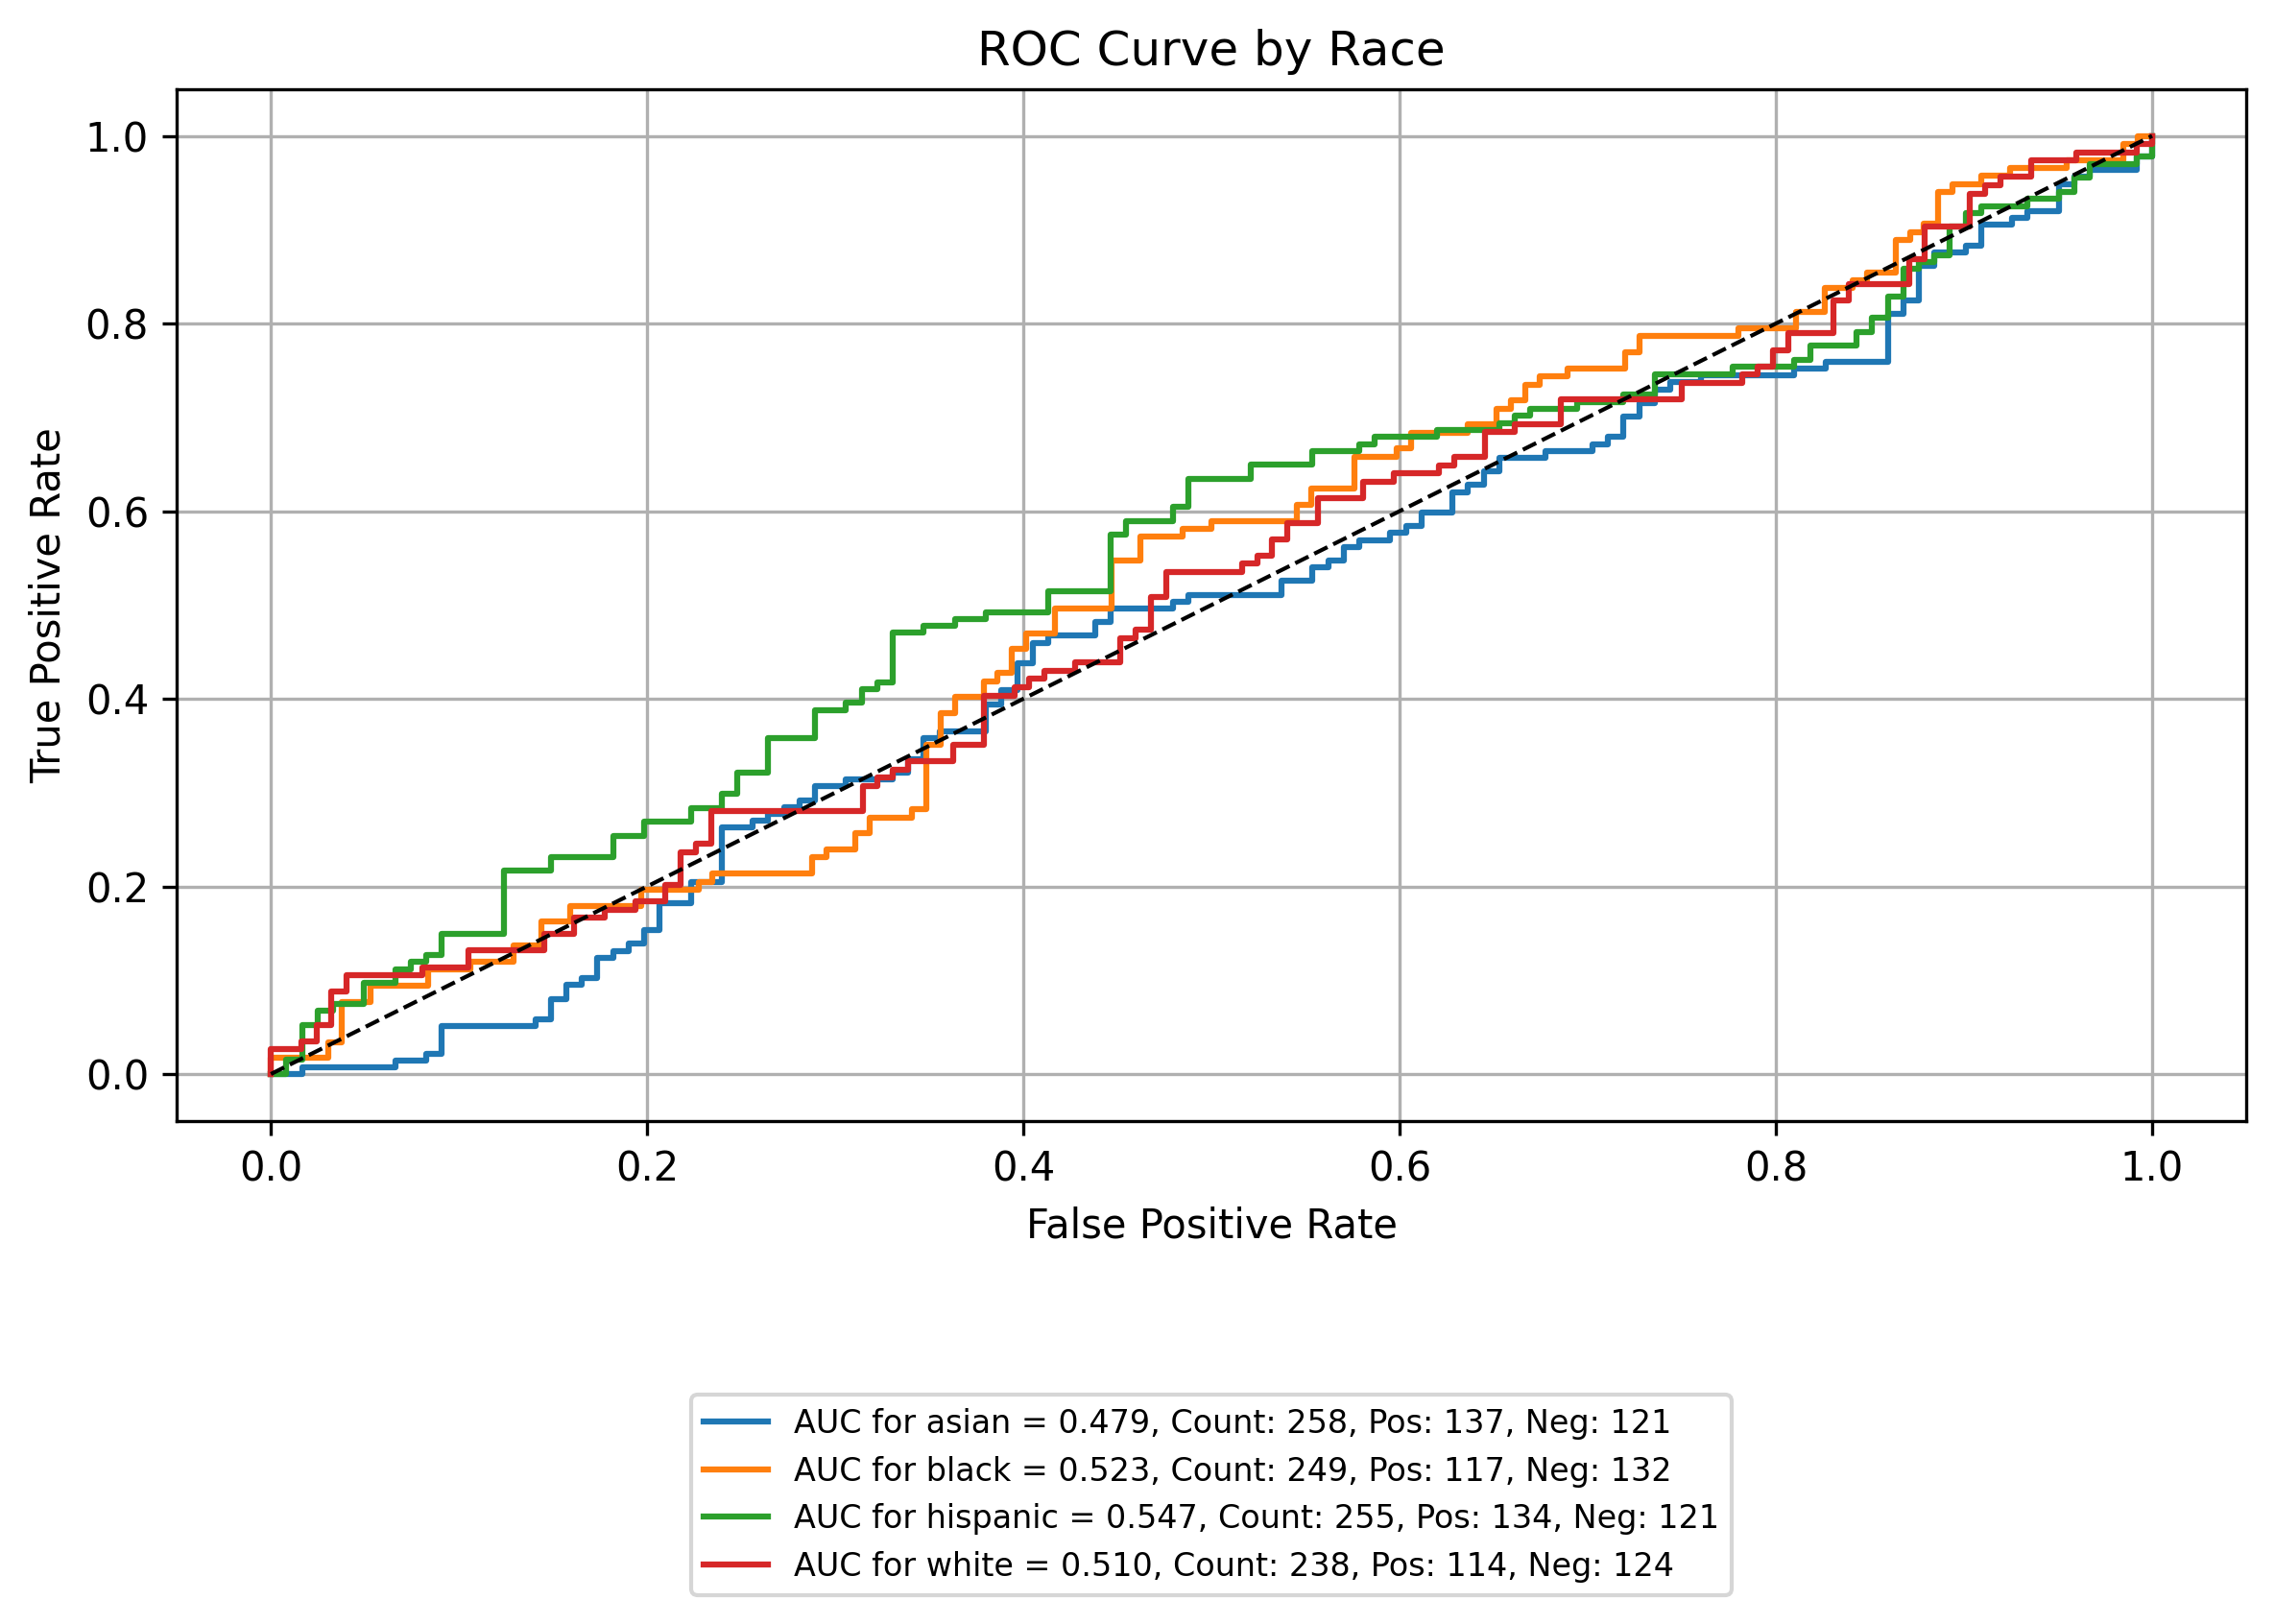

In [6]:
# Generate fake data
y_prob = np.random.rand(1000)
y_pred = y_prob > 0.5
y_true = np.random.randint(0, 2, 1000)

race = np.random.choice(["white", "black", "asian", "hispanic"], 1000).reshape(-1, 1)
sex = np.random.choice(["M", "F"], 1000).reshape(-1, 1)
fairness_df = pd.DataFrame(np.hstack((race, sex)), columns=["race", "sex"])

# Initialize EquiBoots and generate sliced data
eq = EquiBoots(y_true, y_prob, y_pred, fairness_df, fairness_vars=["race", "sex"])
eq.grouper(["race"])
sliced_data = eq.slicer("race")

# Plot interactively
fig = eq_plot_roc_auc(
    data=sliced_data,
    save_path=None,
    filename="roc_by_race",
    title="ROC Curve by Race",
    tick_fontsize=8,
    decimal_places=3,
)
fig.show()